In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks/master/data/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from hyperopt import hp,fmin,tpe,Trials,space_eval
from functools import partial

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df[[i for i in df.columns if i != 'Outcome']],df['Outcome'], test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
model = LogisticRegression()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Outcome,precision,recall,f1-score,support
0,0,0.844828,0.915888,0.878924,107.000000
1,1,0.763158,0.617021,0.682353,47.000000
2,accuracy,0.824675,0.824675,0.824675,0.824675
3,macro avg,0.803993,0.766455,0.780638,154.000000
4,weighted avg,0.819902,0.824675,0.818931,154.000000


In [ ]:
report = pd.DataFrame(metrics.classification_report(Y_test, [1  if i >= 0.9 else 0 for i in model.predict_proba(X_test)[:,1]],output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.704698,0.981308,0.820312,107.000000
1,1,0.600000,0.063830,0.115385,47.000000
2,accuracy,0.701299,0.701299,0.701299,0.701299
3,macro avg,0.652349,0.522569,0.467849,154.000000
4,weighted avg,0.672745,0.701299,0.605172,154.000000


In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.840000,0.785047,0.811594,107.000000
1,1,0.574074,0.659574,0.613861,47.000000
2,accuracy,0.746753,0.746753,0.746753,0.746753
3,macro avg,0.707037,0.722311,0.712728,154.000000
4,weighted avg,0.758841,0.746753,0.751247,154.000000


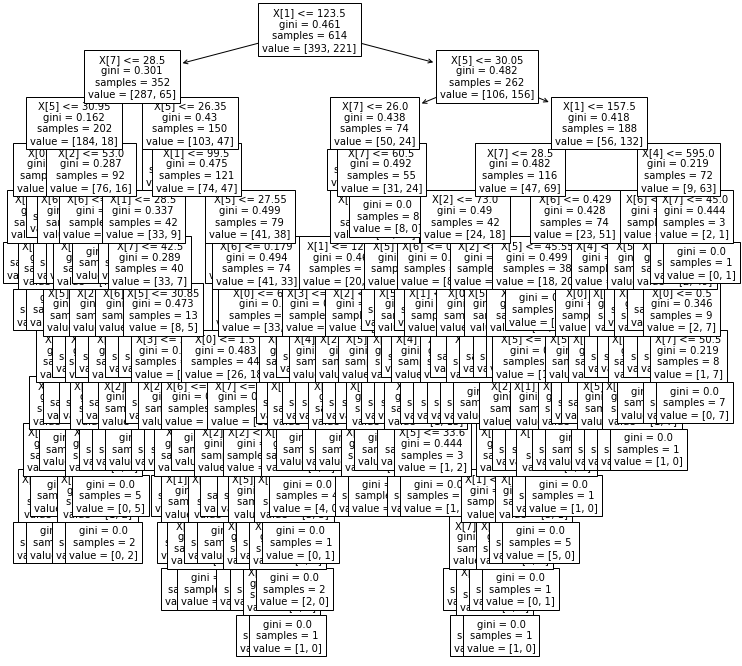

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(model, fontsize=10)
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.801724,0.869159,0.834081,107.00000
1,1,0.631579,0.510638,0.564706,47.00000
2,accuracy,0.759740,0.759740,0.759740,0.75974
3,macro avg,0.716652,0.689899,0.699393,154.00000
4,weighted avg,0.749797,0.759740,0.751869,154.00000


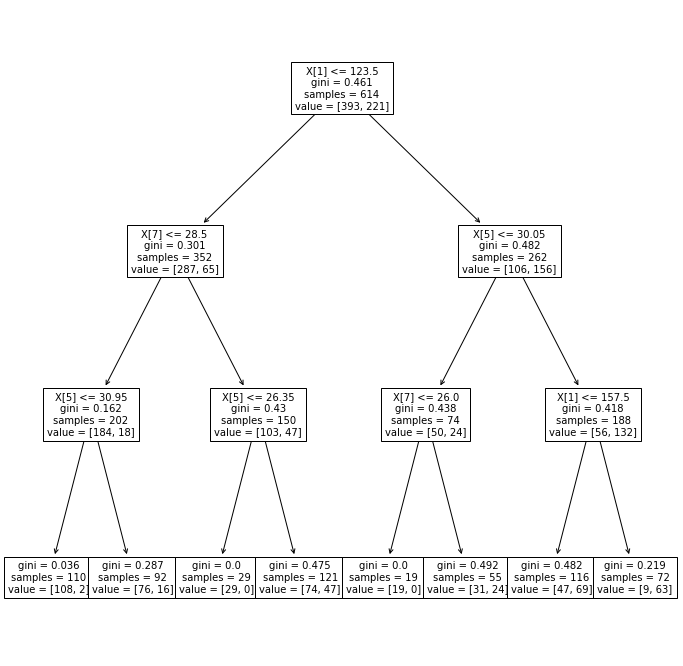

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(model, fontsize=10)
plt.show()

In [ ]:
model = RandomForestClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.830357,0.869159,0.849315,107.000000
1,1,0.666667,0.595745,0.629213,47.000000
2,accuracy,0.785714,0.785714,0.785714,0.785714
3,macro avg,0.748512,0.732452,0.739264,154.000000
4,weighted avg,0.780400,0.785714,0.782141,154.000000


In [ ]:
model = SVC()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.809917,0.915888,0.859649,107.000000
1,1,0.727273,0.510638,0.600000,47.000000
2,accuracy,0.792208,0.792208,0.792208,0.792208
3,macro avg,0.768595,0.713263,0.729825,154.000000
4,weighted avg,0.784695,0.792208,0.780406,154.000000


In [ ]:
model = MLPClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.800000,0.785047,0.792453,107.000000
1,1,0.530612,0.553191,0.541667,47.000000
2,accuracy,0.714286,0.714286,0.714286,0.714286
3,macro avg,0.665306,0.669119,0.667060,154.000000
4,weighted avg,0.717784,0.714286,0.715914,154.000000


In [ ]:
model = XGBClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.869159,0.869159,0.869159,107.000000
1,1,0.702128,0.702128,0.702128,47.000000
2,accuracy,0.818182,0.818182,0.818182,0.818182
3,macro avg,0.785643,0.785643,0.785643,154.000000
4,weighted avg,0.818182,0.818182,0.818182,154.000000


In [ ]:
model = KNeighborsClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.828571,0.813084,0.820755,107.000000
1,1,0.591837,0.617021,0.604167,47.000000
2,accuracy,0.753247,0.753247,0.753247,0.753247
3,macro avg,0.710204,0.715053,0.712461,154.000000
4,weighted avg,0.756321,0.753247,0.754653,154.000000


In [ ]:
model = GaussianNB()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.837838,0.869159,0.853211,107.000000
1,1,0.674419,0.617021,0.644444,47.000000
2,accuracy,0.792208,0.792208,0.792208,0.792208
3,macro avg,0.756128,0.743090,0.748828,154.000000
4,weighted avg,0.787963,0.792208,0.789497,154.000000


In [ ]:
xgb_params = {'learning_rate'   : hp.choice('learning_rate',np.arange(0.05, 0.31, 0.05)),
              'max_depth'       : hp.choice('max_depth', np.arange(1, 16, 1, dtype=int)),
              'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
              'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 1.0, 0.1)),
              'subsample':        hp.uniform('subsample', 0.8, 1),
              'n_estimators':     hp.choice('n_estimators', np.arange(100, 500, 100, dtype=int))}

def xgb_objective_func(params,X_Data,Y_Data):
    model = XGBClassifier(**params)
    CV_pred = cross_val_predict(model,X_Data,Y_Data, cv=StratifiedKFold(n_splits=5),method='predict')
    accuracy = metrics.accuracy_score(Y_Data, CV_pred)
    return -1*accuracy

fmin_objective = partial(xgb_objective_func,X_Data= X_train,Y_Data = Y_train)

xgb_tpe_best = fmin(fn=fmin_objective,
                space=xgb_params,
                algo=tpe.suggest,
                trials=Trials(),
                max_evals=10 )

xgb_hyperparams = space_eval(xgb_params, xgb_tpe_best)

xgb_model = XGBClassifier(**xgb_hyperparams)

xgb_model.fit(X_train,Y_train)

xgb_report = pd.DataFrame(metrics.classification_report(Y_test, xgb_model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
xgb_report

100%|██████████| 10/10 [00:04<00:00,  2.14it/s, best loss: -0.750814332247557]


,Outcome,precision,recall,f1-score,support
0,0,0.863636,0.887850,0.875576,107.000000
1,1,0.727273,0.680851,0.703297,47.000000
2,accuracy,0.824675,0.824675,0.824675,0.824675
3,macro avg,0.795455,0.784351,0.789436,154.000000
4,weighted avg,0.822019,0.824675,0.822997,154.000000


In [ ]:
xgb_model.predict_proba(X_test)

array([[0.30488062, 0.6951194 ],
       [0.8516191 , 0.14838088],
       [0.9129287 , 0.08707127],
       [0.48261803, 0.51738197],
       [0.8742917 , 0.1257083 ],
       [0.94280624, 0.05719377],
       [0.1746884 , 0.8253116 ],
       [0.08231068, 0.9176893 ],
       [0.5490586 , 0.45094138],
       [0.64973044, 0.3502696 ],
       [0.17130393, 0.8286961 ],
       [0.12681592, 0.8731841 ],
       [0.9083239 , 0.09167611],
       [0.7079181 , 0.2920819 ],
       [0.6493941 , 0.3506059 ],
       [0.35506332, 0.6449367 ],
       [0.13547295, 0.86452705],
       [0.97147566, 0.02852433],
       [0.7899304 , 0.21006958],
       [0.8682068 , 0.13179322],
       [0.40426862, 0.5957314 ],
       [0.885224  , 0.11477604],
       [0.71714175, 0.28285825],
       [0.6826416 , 0.31735834],
       [0.97766846, 0.02233153],
       [0.6421442 , 0.35785583],
       [0.9419228 , 0.0580772 ],
       [0.32030106, 0.67969894],
       [0.96384716, 0.03615285],
       [0.92723894, 0.07276107],
       [0.

In [ ]:
df = pd.DataFrame({'Name':['ff', 'gg', 'hh', 'yy'],  'Age':[24, 12, 48, 30]},  columns = ['Name', 'Age'])
df
df['Name']
df.loc[:, 'Name']

0    ff
1    gg
2    hh
3    yy
Name: Name, dtype: object

In [ ]:
#Suppose you are given a dataframe df.
df = pd.DataFrame({'Click_Id':['A','B','C','D','E'],'Count':[100,200,300,400,250]})
#Now you want to change the name of the column ‘Count’ in df to ‘Click_Count’. So, for performing that action you have written the following code.
df.rename(columns = {'Count':'Click_Count'})
#What will be the output of print statement below?
print(df.columns)

Index(['Click_Id', 'Count'], dtype='object')


In [ ]:
teamA = {'india', 'pakistan', 'australia', 'newzealand', 'india', 'kiwis'}
teamB = {'england', 'westIndies','sriLanka','afghanistan', 'pakistan'}
teamB - teamA

{'afghanistan', 'england', 'sriLanka', 'westIndies'}

In [ ]:
teamA.union(teamB)

{'afghanistan',
 'australia',
 'england',
 'india',
 'kiwis',
 'newzealand',
 'pakistan',
 'sriLanka',
 'westIndies'}

In [ ]:
teamB | teamA

{'afghanistan',
 'australia',
 'england',
 'india',
 'kiwis',
 'newzealand',
 'pakistan',
 'sriLanka',
 'westIndies'}

In [ ]:
teamB & teamA

{'pakistan'}